<a href="https://colab.research.google.com/github/damerei/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
  import pandas as pd 
import numpy as np 
import requests
import lxml
!pip3 install quandl
!pip install --upgrade seaborn
import seaborn as sns
import quandl




Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [6]:
sns.__version__

'0.9.0'

In [9]:
rf = pd.read_csv("merged.csv")



rf.head()



,Datasheets,Image,Digi-Key Part Number,Manufacturer Part Number,Manufacturer,Description,Quantity Available,Factory Stock,Unit Price (USD),@ qty,...,Frequency,P1dB,Gain,Noise Figure,RF Type,Voltage - Supply,Current - Supply,Test Frequency,Package / Case,Supplier Device Package
0,https://www.infineon.com/dgdl/BGA725L6_V2+0.pd...,//media.digikey.com/Renders/Fairchild%20Semi%2...,BGA725L6E6327FTSA1TR-ND,BGA725L6E6327FTSA1,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,60000,0,0.13770,0,...,1.55GHz ~ 1.615GHz,-16dBm,20dB,0.65dB,GPS/GNSS,1.5V ~ 3.6V,3.6mA,-,6-XFDFN,TSLP-6-2
1,https://www.infineon.com/dgdl/BGA725L6_V2+0.pd...,//media.digikey.com/Renders/Fairchild%20Semi%2...,BGA725L6E6327FTSA1CT-ND,BGA725L6E6327FTSA1,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072,0,0.40000,0,...,1.55GHz ~ 1.615GHz,-16dBm,20dB,0.65dB,GPS/GNSS,1.5V ~ 3.6V,3.6mA,-,6-XFDFN,TSLP-6-2
2,https://www.infineon.com/dgdl/BGA725L6_V2+0.pd...,//media.digikey.com/Renders/Fairchild%20Semi%2...,BGA725L6E6327FTSA1DKR-ND,BGA725L6E6327FTSA1,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072,0,Digi-Reel,0,...,1.55GHz ~ 1.615GHz,-16dBm,20dB,0.65dB,GPS/GNSS,1.5V ~ 3.6V,3.6mA,-,6-XFDFN,TSLP-6-2
3,https://www.infineon.com/dgdl/bga420.pdf?folde...,//media.digikey.com/Renders/~~Pkg.Case%20or%20...,BGA420H6327XTSA1TR-ND,BGA420H6327XTSA1,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,9000,0,0.32102,0,...,0Hz ~ 3GHz,-2.5dBm,13dB,2.3dB,General Purpose,3V ~ 6V,6.7mA,1GHz,"SC-82A, SOT-343",PG-SOT343-4
4,https://www.infineon.com/dgdl/bga420.pdf?folde...,//media.digikey.com/Renders/~~Pkg.Case%20or%20...,BGA420H6327XTSA1CT-ND,BGA420H6327XTSA1,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,10931,0,0.84000,0,...,0Hz ~ 3GHz,-2.5dBm,13dB,2.3dB,General Purpose,3V ~ 6V,6.7mA,1GHz,"SC-82A, SOT-343",PG-SOT343-4


In [10]:
drop = ['Datasheets', 'Image', 'Digi-Key Part Number', 'Manufacturer Part Number', 'Packaging', 'Series', 'Gain', 'Noise Figure', 'Voltage - Supply', 'Current - Supply']

rfc = rf.drop(columns=drop)

rfc

,Manufacturer,Description,Quantity Available,Factory Stock,Unit Price (USD),@ qty,Minimum Quantity,Part Status,Frequency,P1dB,RF Type,Test Frequency,Package / Case,Supplier Device Package
0,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,60000,0,0.13770,0,15000,Active,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
1,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072,0,0.40000,0,1,Active,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
2,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072,0,Digi-Reel,0,1,Active,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
3,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,9000,0,0.32102,0,3000,Active,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
4,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,10931,0,0.84000,0,1,Active,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
5,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,10931,0,Digi-Reel,0,1,Active,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
6,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3000,0,0.40481,0,3000,Active,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
7,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3956,0,0.99000,0,1,Active,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
8,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3956,0,Digi-Reel,0,1,Active,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
9,Skyworks Solutions Inc.,IC AMP 802.11B/G/N 2.4GHZ 6DFN,126000,0,0.40740,0,3000,Active,2.4GHz,-,802.11b/g/n,2.4GHz,6-XFDFN Exposed Pad,6-DFN (1.5x1.5)


In [12]:
company_count = rfc['Manufacturer'].value_counts()

company_count

Analog Devices Inc.                      930
Skyworks Solutions Inc.                  338
NXP USA Inc.                             273
M/A-Com Technology Solutions             156
Infineon Technologies                    137
Maxim Integrated                         134
Microsemi Corporation                     66
Texas Instruments                         64
L3 Narda-MITEQ                            61
Microwave Technology Inc.                 53
RFMD                                      52
Microchip Technology                      47
Panasonic Electronic Components           42
NJR Corporation/NJRC                      18
IDT, Integrated Device Technology Inc     17
Broadcom Limited                          17
ON Semiconductor                          16
Cree/Wolfspeed                            14
Diodes Incorporated                       13
Renesas Electronics America Inc.          12
Tallysman Wireless Inc.                   12
Ampleon USA Inc.                           9
CEL       

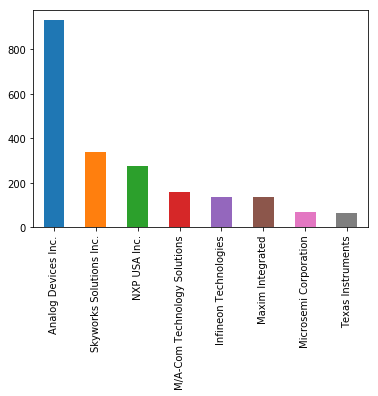

In [13]:
company_count_top8 = company_count[:8]

ax = company_count_top8.plot.bar()

                   Manufacturer  Returns
0                Analog Devices   115.76
1       Skyworks Solutions Inc.   151.19
2                  NXP USA Inc.    75.26
3  M/A-Com Technology Solutions    13.17
4         Infineon Technologies   104.12


Manufacturer     object
Returns         float64
dtype: object

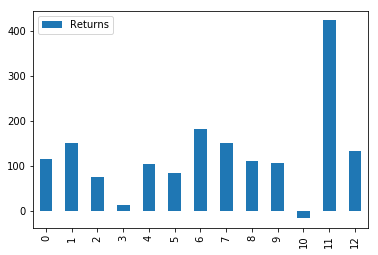

In [31]:
returns.plot.bar()


In [14]:
rfc.dtypes



Manufacturer               object
Description                object
Quantity Available         object
Factory Stock              object
Unit Price (USD)           object
@ qty                      object
Minimum Quantity           object
Part Status                object
Frequency                  object
P1dB                       object
RF Type                    object
Test Frequency             object
Package / Case             object
Supplier Device Package    object
dtype: object

In [15]:
rfc['Quantity Available'] = pd.to_numeric(rfc['Quantity Available'], errors='coerce')

rfc['Part Status'] = rfc['Part Status'].to_string()

rfc.dtypes

Manufacturer                object
Description                 object
Quantity Available         float64
Factory Stock               object
Unit Price (USD)            object
@ qty                       object
Minimum Quantity            object
Part Status                 object
Frequency                   object
P1dB                        object
RF Type                     object
Test Frequency              object
Package / Case              object
Supplier Device Package     object
dtype: object

In [16]:
instock = rfc[(rfc['Quantity Available'] > 0) & (rfc['Part Status'] != "Obsolete")]

instock

,Manufacturer,Description,Quantity Available,Factory Stock,Unit Price (USD),@ qty,Minimum Quantity,Part Status,Frequency,P1dB,RF Type,Test Frequency,Package / Case,Supplier Device Package
0,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,60000.0,0,0.13770,0,15000,0 Active\n1 ...,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
1,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072.0,0,0.40000,0,1,0 Active\n1 ...,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
2,Infineon Technologies,IC AMP GPS 1.55-1.615GHZ TSLP6-2,87072.0,0,Digi-Reel,0,1,0 Active\n1 ...,1.55GHz ~ 1.615GHz,-16dBm,GPS/GNSS,-,6-XFDFN,TSLP-6-2
3,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,9000.0,0,0.32102,0,3000,0 Active\n1 ...,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
4,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,10931.0,0,0.84000,0,1,0 Active\n1 ...,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
5,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,10931.0,0,Digi-Reel,0,1,0 Active\n1 ...,0Hz ~ 3GHz,-2.5dBm,General Purpose,1GHz,"SC-82A, SOT-343",PG-SOT343-4
6,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3000.0,0,0.40481,0,3000,0 Active\n1 ...,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
7,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3956.0,0,0.99000,0,1,0 Active\n1 ...,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
8,Infineon Technologies,IC RF AMP GP 0HZ-3GHZ SOT343-4,3956.0,0,Digi-Reel,0,1,0 Active\n1 ...,0Hz ~ 3GHz,-,General Purpose,1.8GHz,"SC-82A, SOT-343",PG-SOT343-4
9,Skyworks Solutions Inc.,IC AMP 802.11B/G/N 2.4GHZ 6DFN,126000.0,0,0.40740,0,3000,0 Active\n1 ...,2.4GHz,-,802.11b/g/n,2.4GHz,6-XFDFN Exposed Pad,6-DFN (1.5x1.5)


In [68]:
companies = instock['Manufacturer'].value_counts().rename_axis('Manufacturer').reset_index(name='Products Available')

companies8 = companies[:8]

companies8






,Manufacturer,Products Available
0,Analog Devices Inc.,531
1,Skyworks Solutions Inc.,218
2,NXP USA Inc.,209
3,M/A-Com Technology Solutions,112
4,Maxim Integrated,89
5,Infineon Technologies,84
6,Texas Instruments,42
7,Panasonic Electronic Components,29


Analog Devices Inc.                531
Skyworks Solutions Inc.            218
NXP USA Inc.                       209
M/A-Com Technology Solutions       112
Maxim Integrated                    89
Infineon Technologies               84
Texas Instruments                   42
Panasonic Electronic Components     29
Name: Manufacturer, dtype: int64

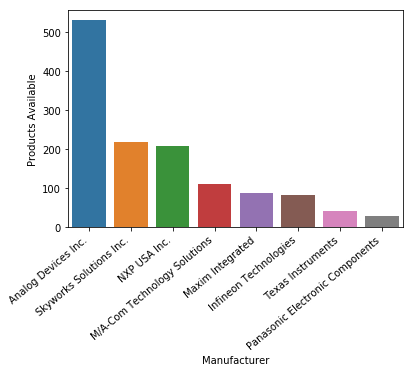

In [64]:

axc = sns.barplot(x='Manufacturer', y='Products Available', data=companies8)

axc.set_xticklabels(axc.get_xticklabels(), rotation=40, ha="right");



In [74]:
returns5 = [115.76, 151.19, 75.26, 13.17, 104.12, 84.51, 183.35, 151.47, 110.8, 106.7, -15.08, 423.8, 134.00, 55.5]

names = ['Analog Devices Inc.', 'Skyworks Solutions Inc.', 'NXP USA Inc.', 'M/A-Com Technology Solutions', 'Infineon Technologies', 'Maxim Integrated', 'Microsemi Corporation', 'Texas Instruments', 'RFMD', 'Microchip Technology', 'Panasonic Electronic Components', 'NJR Corporation/NJRC','ON Semiconductor', 'S&P 500'] 

returns_dict = {'Manufacturer': names, 'Returns': returns5}

returns = pd.DataFrame(data=returns_dict)

print(returns)




                       Manufacturer  Returns
0               Analog Devices Inc.   115.76
1           Skyworks Solutions Inc.   151.19
2                      NXP USA Inc.    75.26
3      M/A-Com Technology Solutions    13.17
4             Infineon Technologies   104.12
5                  Maxim Integrated    84.51
6             Microsemi Corporation   183.35
7                 Texas Instruments   151.47
8                              RFMD   110.80
9              Microchip Technology   106.70
10  Panasonic Electronic Components   -15.08
11             NJR Corporation/NJRC   423.80
12                 ON Semiconductor   134.00
13                          S&P 500    55.50


In [75]:
public = companies[companies['Manufacturer'].isin(names) == True]

public


,Manufacturer,Products Available
0,Analog Devices Inc.,531
1,Skyworks Solutions Inc.,218
2,NXP USA Inc.,209
3,M/A-Com Technology Solutions,112
4,Maxim Integrated,89
5,Infineon Technologies,84
6,Texas Instruments,42
7,Panasonic Electronic Components,29
8,RFMD,29
9,Microchip Technology,24


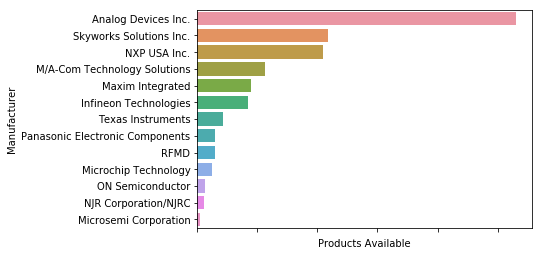

In [92]:
axp = sns.barplot(x='Products Available', y='Manufacturer', data=public)
axp.set_xticklabels(axp.get_xticklabels(), rotation=40, ha="right");
axp.



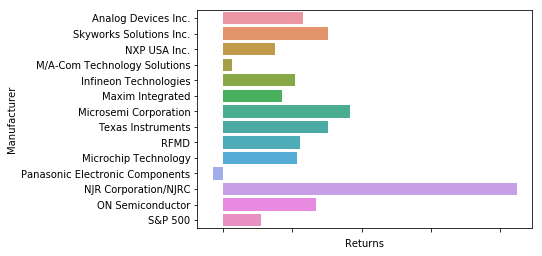

In [91]:
axr = sns.barplot(x='Returns', y='Manufacturer', data=returns)

axr.set_xticklabels(axr.get_xticklabels(), rotation=40, ha="right");



In [89]:
mean_returns = returns[:12].mean()

mean_returns

sp_returns = 55.5 

portfolio = [mean_returns, sp_returns]

portfolio_names = ["Mean Portfolio Returns, 5Y", "S&P Returns, 5Y"]

returns_dict = {"Hypothetical Portfolio": portfolio_names, "Returns": portfolio}

compare = pd.DataFrame(returns_dict)

compare




,Hypothetical Portfolio,Returns
0,"Mean Portfolio Returns, 5Y",Returns 125.420833 dtype: float64
1,"S&P Returns, 5Y",55.5


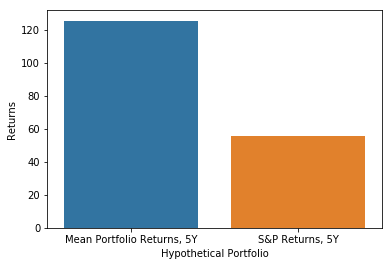

In [90]:
ax_mean = sns.barplot(x="Hypothetical Portfolio", y='Returns', data=compare)



TypeError: ignored